In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#from random import shuffle
import glob
import re
import h5py
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split 
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import regularizers
np.set_printoptions(precision=3, suppress=True) #Make numpy easier to read

In [ ]:
os.chdir("/content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/")


In [ ]:
ls

'Copia de ImageClasification_algorithm (2).ipynb'
'Copia de ImageClasification_algorithm.ipynb'
 DataAugmentationOneClass.ipynb
 DataBase/
 ImageClasification_algorithm.ipynb
 ImageSplitManyClasses.ipynb
 MLP_Clasificador_algorithm.ipynb
 my_model.h5
 OriginalDataBase/
 Untitled0.ipynb
 vgg16_block3_ImageClasification_algorithm.ipynb
'VGG16_block4_ ImageClasification_algorithm.ipynb'


In [ ]:
train_path = "//content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/train"
validation_path = "//content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/validation"


In [ ]:
def trainFileCount(train_path):
  total_file_training= 0;
  basename ='';
  for root, dirnames, filenames in os.walk(train_path):
    for dirname in dirnames:
      directory_training = os.path.join(train_path, dirname) 
      directory_training = directory_training + os.sep
      num_file_training = len(os.listdir(directory_training))
      total_file_training = total_file_training + num_file_training
      basename = os.path.basename(train_path)
      print('total',basename, dirname,' images:',num_file_training)
  print('Total', basename,' images:',total_file_training)
  print('-------------------------------------------------------')


In [ ]:
total_train_img = trainFileCount(train_path)
total_Validation_img = trainFileCount(validation_path)


total train Ptosis  images: 1054
total train Ectropion  images: 482
total train Chalazion  images: 218
total train Triquiasis  images: 163
total train TumorParpado  images: 368
total train BlefaroChalasis  images: 581
total train Blefaritis  images: 132
total train Xanthelasma  images: 184
Total train  images: 3182
-------------------------------------------------------
total validation Ptosis  images: 264
total validation Ectropion  images: 121
total validation Chalazion  images: 55
total validation Triquiasis  images: 41
total validation TumorParpado  images: 92
total validation BlefaroChalasis  images: 146
total validation Blefaritis  images: 33
total validation Xanthelasma  images: 46
Total validation  images: 798
-------------------------------------------------------


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
img = cv2.imread('/content/drive/My Drive/DeplomadoDeepLearning/Gomez_Saul/Proyecto/DataBase/train/Blefaritis/1.png')
img.shape

(164, 164, 3)

In [ ]:
batch_size = 32
epochs = 50
IMG_SHAPE = 164

In [ ]:
image_generator_train = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=15,
                    width_shift_range=.005, 
                    height_shift_range=.005, 
                    horizontal_flip=True, 
                    zoom_range=0.3
                    )


In [ ]:
image_generator_validation = ImageDataGenerator(
                    rescale=1./255, 
                    rotation_range=20, 
                    width_shift_range=.01, 
                    height_shift_range=.01, 
                    horizontal_flip=True, 
                    zoom_range=0.3
                    )

In [ ]:
train_data_generator = image_generator_train.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=train_path, 
                                                shuffle=True, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 3182 images belonging to 8 classes.


In [ ]:
Validation_data_generator = image_generator_validation.flow_from_directory(
                                                batch_size=batch_size, 
                                                directory=validation_path, 
                                                shuffle=False, 
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='binary'
                                                )

Found 798 images belonging to 8 classes.


In [ ]:
augmented_images = [train_data_generator[0][0][1] for i in range(5)]

In [ ]:
sample_training_images, _ = next(train_data_generator) 
sample_training_images.shape

(32, 164, 164, 3)

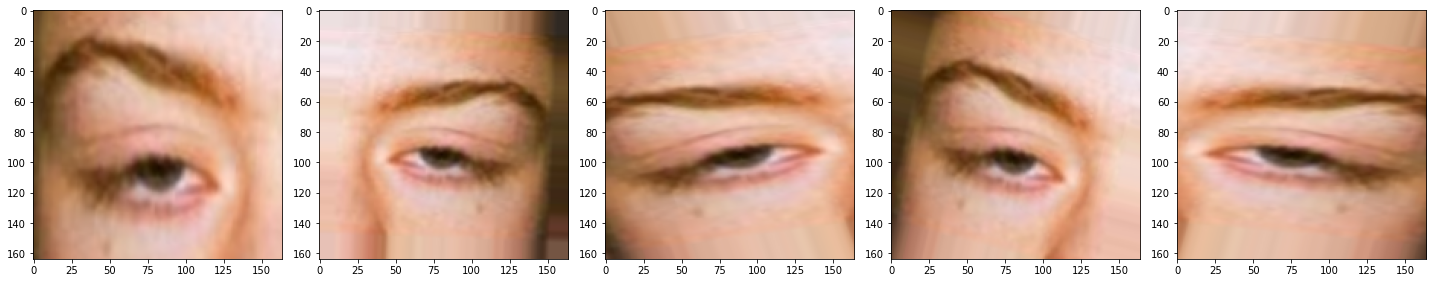

In [ ]:
plotImages(augmented_images[:5])

In [ ]:
# Herramienta para ver el comportamiento del entrenamiento
def plot_train_performance(train_data):
    acc = train_data.history['accuracy']
    val_acc = train_data.history['val_accuracy']
    loss = train_data.history['loss']
    val_loss = train_data.history['val_loss']

    epochs = range(1,len(acc)+1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

In [ ]:
# Funcion para comparar las predicciónes
import numpy as np
def show_pred(test_ds):
    to_predict_data = test_ds.batch(1).take(9)
    results = np.argmax(model.predict(to_predict_data),axis=1)

    import matplotlib.pyplot as plt # A continuación se muestra un ejemplo con su etiqueta
    fig = plt.figure(figsize=(20,20))
    for i, (image, label) in enumerate(to_predict_data):
      res_plt = fig.add_subplot(3, 3, i+1)
      res_plt.set_title(classes_dict[int(np.squeeze(label.numpy()))])
      predicted_lbl = "Predicted: " + classes_dict[results[i]]
      res_plt.set_xlabel(predicted_lbl)
      plt.imshow(np.squeeze(image.numpy()*255).astype(np.uint8))
    plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions 

HEIGHT, WIDTH, CHANNELS = (164,164,3) # el tamaño de las imagenes
input_t = keras.Input(shape=(HEIGHT, WIDTH, CHANNELS)) 
transfer_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_t) # no se incluyen las redes neuronales del final de la aqruitectura

transfer_model.trainable = False # Se congelan los pesos de la arquitectura usada como 
transfer_model.summary() # Se observa la arqutiectura para decidir donnde tomar las caracteristicas

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 164, 164, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 164, 164, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 164, 164, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 82, 82, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 82, 82, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 82, 82, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 41, 41, 128)       0     

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

middle = transfer_model.get_layer('block4_pool')
newmodel = Model(inputs = input_t, outputs=middle.output)

#create model
model = Sequential()
#add model layers
model.add(newmodel)
model.add(Conv2D(512, 4, padding='same', activation='relu')) 
model.add(Conv2D(512, 5, padding='same', activation='relu', )) 
model.add(Conv2D(256, 4, padding='same', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation="softmax"))

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 10, 10, 512)       7635264   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 512)       4194816   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 512)       6554112   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 256)       2097408   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [ ]:
# # Process examples without training
# for image,label in Validation_data_generator:
#   pred = model(image).numpy()
#   print(pred) # Procesing one example
#   print(pred.shape)
 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resume = model.fit(train_data_generator, 
                   validation_data=Validation_data_generator,
                   epochs=epochs)
model.save('my_model.h5') 

Epoch 1/50
100/100 [==============================] - 391s 4s/step - loss: 1.7613 - accuracy: 0.3360 - val_loss: 1.4834 - val_accuracy: 0.4724
Epoch 2/50
100/100 [==============================] - 44s 437ms/step - loss: 1.3949 - accuracy: 0.4868 - val_loss: 1.3228 - val_accuracy: 0.5201
Epoch 3/50
100/100 [==============================] - 44s 439ms/step - loss: 1.2337 - accuracy: 0.5553 - val_loss: 1.3081 - val_accuracy: 0.5476
Epoch 4/50
100/100 [==============================] - 44s 436ms/step - loss: 1.0629 - accuracy: 0.6194 - val_loss: 1.1302 - val_accuracy: 0.6015
Epoch 5/50
100/100 [==============================] - 44s 437ms/step - loss: 0.9893 - accuracy: 0.6471 - val_loss: 1.2671 - val_accuracy: 0.5589
Epoch 6/50
100/100 [==============================] - 44s 439ms/step - loss: 0.8899 - accuracy: 0.6882 - val_loss: 1.1237 - val_accuracy: 0.6128
Epoch 7/50
100/100 [==============================] - 44s 444ms/step - loss: 0.8276 - accuracy: 0.7156 - val_loss: 1.0895 - val_accu

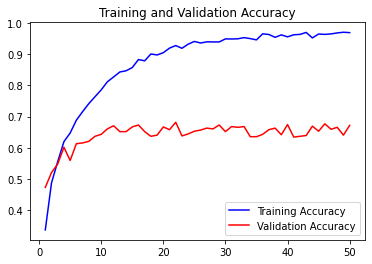

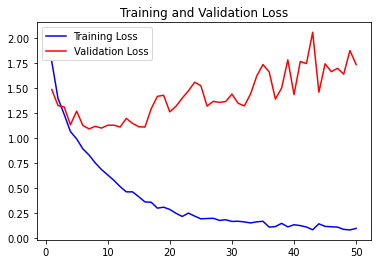

In [ ]:
plot_train_performance(resume)

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')
new_model.trainable = True
new_model.summary()

In [ ]:
new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resume = new_model.fit(train_data_generator, 
                   validation_data=Validation_data_generator,
                   epochs=epochs)

In [ ]:
show_pred(Validation_data_generator)